In [1]:
import glob
import numpy as np
import pandas as pd 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
def dataset_extraction(path,class_number):
    x_train=[]
    y_train=[]
    all_images=glob.glob(path+'/*.jpg')
    for path in all_images :
            img=load_img(path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
            y_train.append(class_number)
    return np.array(x_train),np.array(y_train)

In [4]:
from datetime import datetime 

In [7]:
start_time = datetime.now() 
trainX_building, trainY_building  = dataset_extraction("E://seg_train/seg_train/buildings/",0)
trainX_forest,trainY_forest  = dataset_extraction("E://seg_train/seg_train/forest/",1)
trainX_glacier,trainY_glacier  = dataset_extraction("E://seg_train/seg_train/glacier/",2)
trainX_mount,trainY_mount  = dataset_extraction("E://seg_train/seg_train/mountain/",3)
trainX_sea,trainY_sea  = dataset_extraction("E://seg_train/seg_train/sea/",4)
trainX_street,trainY_street  = dataset_extraction("E://seg_train/seg_train/street/",5)

print('Time taken to run this cell is  (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Time taken to run this cell is  (hh:mm:ss.ms) 0:00:41.039299


In [8]:
start_time = datetime.now() 
x_train =np.concatenate((trainX_building,trainX_forest,trainX_glacier,trainX_mount,trainX_sea,trainX_street),axis=0)
y_train = np.concatenate((trainY_building,trainY_forest,trainY_glacier,trainY_mount,trainY_sea,trainY_street),axis=0)
print('Time taken to run this cell is  (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Time taken to run this cell is  (hh:mm:ss.ms) 0:00:41.729736


In [9]:
testX_building, testY_building  = dataset_extraction("E://seg_test/seg_test/buildings/",0)
testX_forest,testY_forest  = dataset_extraction("E://seg_test/seg_test/forest/",1)
testX_glacier,testY_glacier  = dataset_extraction("E://seg_test/seg_test/glacier/",2)
testX_mount,testY_mount  = dataset_extraction("E://seg_test/seg_test/mountain/",3)
testX_sea,testY_sea  = dataset_extraction("E://seg_test/seg_test/sea/",4)
testX_street,testY_street  =  dataset_extraction("E://seg_test/seg_test/street/",5)

x_test=np.concatenate((testX_building,testX_forest,testX_glacier,testX_mount,testX_sea,testX_street),axis=0)
y_test=np.concatenate((testY_building,testY_forest,testY_glacier,testY_mount,testY_sea,testY_street),axis=0)

In [10]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [11]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")


In [12]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
for layer in pre_trained_model.layers:
     layer.trainable = False

In [18]:
last_layer = pre_trained_model.get_layer('mixed6')
last_output = last_layer.output

In [19]:
my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(1024, activation='relu')(my_layer)
my_layer = layers.Dropout(0.3)(my_layer)                  
my_layer = layers.Dense(6, activation='softmax')(my_layer)  

In [20]:
model = Model(pre_trained_model.input, my_layer) 

In [21]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [22]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [23]:
start_time = datetime.now() 
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
print('Time taken to run this cell is  (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Epoch 1/5
439/439 [==============================] - 604s 1s/step - loss: 0.5997 - acc: 0.8316 - val_loss: 0.3096 - val_acc: 0.8933
Epoch 2/5
439/439 [==============================] - 489s 1s/step - loss: 0.3080 - acc: 0.9010 - val_loss: 0.2969 - val_acc: 0.9033
Epoch 3/5
439/439 [==============================] - 426s 970ms/step - loss: 0.2429 - acc: 0.9244 - val_loss: 0.4309 - val_acc: 0.8817
Epoch 4/5
439/439 [==============================] - 420s 957ms/step - loss: 0.1862 - acc: 0.9400 - val_loss: 0.4673 - val_acc: 0.8923
Epoch 5/5
439/439 [==============================] - 419s 955ms/step - loss: 0.1365 - acc: 0.9568 - val_loss: 0.4837 - val_acc: 0.8910
Time taken to run this cell is  (hh:mm:ss.ms) 0:40:09.103227


In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

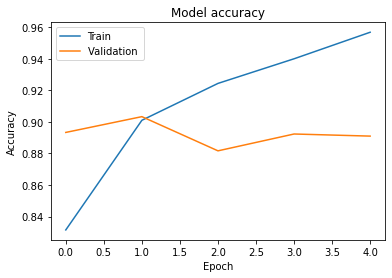

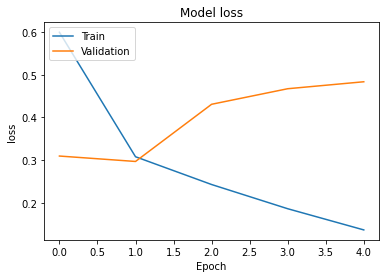

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation '],loc = 'upper left')
plt.show()

#Plot training and validation loss values 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')

plt.show()